# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. `Pandas` и `Seaborn`

При возникновении сложностей, связанных с Питоном и библиотеками, посмотрите материалы видео-курса <a href="https://mipt-stats.gitlab.io/courses/python.html">Python для анализа данных</a>. Если не помогло, задайте вопрос по заданию.

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb. 
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 4 балла
* Задача 2 &mdash; 2 балла

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 5 баллов
* Задача 4 &mdash; 3 балла
* Задача 5 &mdash; 8 баллов

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

Представьте, что вы министр образования страны котиков. Вам нужно решить какие школы лучше: маленькие или большие. Вы решили, что нужно сравнить их по результатам единого кошачьего экзамена (ЕКЭ). Предлагается посмотреть на средний результат по школам: отсортировать по нему и сделать выводы исходя из топ 10 лучших школ.

Вам дан датасет `cat_exam_data.csv` со следующими полями:
* `school` &mdash; номер школы;
* `test_score` &mdash; результат одного ученика из этой школы;
* `number_of_students` &mdash; кол-во учеников в школе.

Приведены данные по всем ученикам из 500 школ страны котиков.

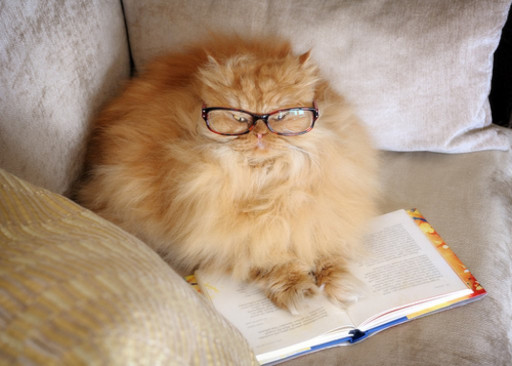

Загрузите датасет с результатами экзамена и посмотрите на первые пять строк.

*Подсказка.* Это можно сделать с помощью методов  <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head</a>.

In [78]:
dates = pd.read_csv('cat_exam_data.csv')  
dates.head()

,school,test_score,number_of_students
0,26,39.0,965
1,54,64.0,1483
2,356,64.0,1055
3,108,68.0,1806
4,298,78.0,971


Проверьте, что в данных нет пропусков (`NaN`). Если они есть:
* проверьте в каком столбце;
* удалите их.

*Подсказка.* Могут помочь методы <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html">isna</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">dropna</a>.

In [79]:
table = dates.dropna()
table.isna().any()

school                False
test_score            False
number_of_students    False
dtype: bool

Посчитайте описательные статистики (среднее, мин, макс, и тд.) по колонкам в таблице с помощью одной функции.

In [80]:
table.describe()

,school,test_score,number_of_students
count,501358.000000,501358.000000,501358.000000
mean,250.096795,51.681788,1088.910569
std,144.428420,14.179981,281.016801
min,0.000000,-0.000000,156.000000
25%,125.000000,42.000000,890.000000
50%,250.000000,52.000000,1079.000000
75%,377.000000,61.000000,1285.000000
max,499.000000,100.000000,1806.000000


Отдельного внимания заслуживает среднее. Какими способами его можно посчитать? Произведите вычисления и *подробно* проинтерпретируйте результаты. Что стоит публиковать в официальной статистике?

In [81]:
print(table["school"].mean())
print(table["test_score"].mean())
print(table["number_of_students"].mean())

250.09679510449618
51.68178826307748
1088.9105688948814


Средний балл можно посчитать различными способами. Например, можно посчитать сумму и разделить на количество, но эффективнее просто использовать mean(). От способов вычисления среднего значения, результат не изменится. Это лишь влияет на скорость.

Информация про средний номер школы бесполезна. В официальную статистику стоит публиковать только средний тестовый балл учеников и среднее количество учебников по всем школам. Отсюда можем понять как хорошо или как плохо написали тест ученики и как много учеников писали тест.

Посчитайте сколько котиков получили 100 баллов.

In [82]:
(table["test_score"] == 100).sum()

51

Выведите подробную информацию о школах, где есть хотя бы один котик, получивший 100 баллов на ЕКЭ.
Отсортируйте эти школы по количеству стобалльников.

*Подсказка.* Могут помочь методы <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">groupby</a>, <a target="_blank" href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.sort_values.html">sort_values</a>, <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html">transform</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html">count</a>.

In [83]:
table.groupby('school').mean().sort_values('test_score')

,test_score,number_of_students
school,,
353,50.050595,336
211,50.248571,351
486,50.325000,800
471,50.362500,960
194,50.406977,774
...,...,...
366,52.970207,773
82,52.981982,555
263,52.982063,669


Посчитайте средний результат каждой из школ и посмотрите на результат. Рассматриваем все школы, не только со стобальниками.

*Подсказка.* Может помочь метод <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">mean</a>.

In [84]:
school = table.groupby("school").mean("test_score")
school

,test_score,number_of_students
school,,
0,52.294258,418
1,52.028950,1209
2,51.751451,1035
3,51.566265,1245
4,51.025641,1015
...,...,...
495,50.933275,1139
496,51.146402,1209
497,51.141228,1140


Отсортируйте школы по среднему результату.

In [85]:
school.sort_values("test_score", ascending=False).head(10)

,test_score,number_of_students
school,,
57,53.341682,560
124,52.993311,598
263,52.982063,669
82,52.981982,555
366,52.970207,773
465,52.957555,1179
169,52.932401,858
449,52.910364,357
477,52.898515,808


Посмотрите на топ 10 лучших результатов.

**Вывод:** Из таблицы видим, что школа под номером 57 имеет наивысший средний бал 53.34 при этом число студентов в школе не сильно меньше относительно остальных школ из нашего топ 10 лучших результатов. Наименьше всего студентов в школе с номером 464, где средний тестовый балл 52.87. Можно сделать предположение, что средний тестовый балл не зависит от количества учеников в школе.

Ожидаем, что внизу рейтинга будут только большие школы, давайте это проверим. Посмотрите теперь на 10 худших школ.

In [86]:
table.groupby("school").mean("test_score").sort_values("test_score", ascending=True).head(10) 

,test_score,number_of_students
school,,
353,50.050595,336
211,50.248571,351
486,50.325000,800
471,50.362500,960
194,50.406977,774
394,50.461538,1079
156,50.641354,1093
48,50.690293,649
264,50.702906,929


**Вывод:** Получили, что в списке топ 10 худших школ есть и довольно маленькие школы, например школа под номером 211. Эта школа даже меньше всех школ из топ 10 лучших. Так что это неправда, что внизу рейтинга будут только большие школы. Покажем дальше наглядно, как распределяется средний тесовый балл от количества учеников.

Постройте график зависимости среднего результата ЕКЭ от количества учеников.

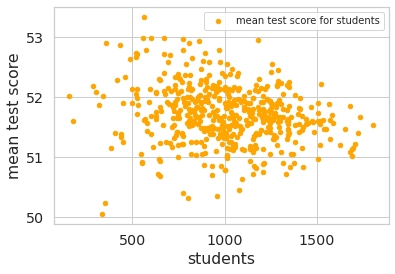

In [87]:
df = pd.DataFrame({'mean test score': school['test_score'], 'students': school['number_of_students']})
df.plot(y='mean test score', x='students', kind='scatter', color='orange')
plt.legend(['mean test score for students'], prop={"size":10})

plt.show()

**Вывод:** Из графика видно, что средний тестовый балл находится в районе между 51 и 52, а именно 51.68, как мы находили раньше, и он не зависит от числа студентов в школе, как и предполагалось выше. Чем меньше учеников, тем сильнее у них разброс по баллам и чем больше число учеников, тем ближе они к 51.68. 

Но как же тогда решить какие школы лучше? 

Сгруппируйте учеников в зависимости от типа школы, получив тем самым два датасета. Будем считать, что школа небольшая, если в ней не более 1000 учеников.

In [88]:
small_schools = table[table.number_of_students <= 1000]
pd.pivot_table(small_schools, index = ['school'])

small_schools.head(10)

,school,test_score,number_of_students
0,26,39.0,965
4,298,78.0,971
7,155,43.0,969
8,359,33.0,895
9,416,45.0,522
13,87,68.0,675
20,58,29.0,580
21,278,66.0,851
22,359,24.0,895
24,226,65.0,923


In [89]:
large_schools = table[table.number_of_students > 1000]
pd.pivot_table(large_schools, index = ['school'])

large_schools.head(10)

,school,test_score,number_of_students
1,54,64.0,1483
2,356,64.0,1055
3,108,68.0,1806
5,386,29.0,1027
6,317,51.0,1135
10,457,86.0,1106
11,222,59.0,1467
12,293,48.0,1166
14,3,41.0,1245
15,296,30.0,1027


Постройте гистограммы этих двух выборок на одном графике, установив параметры
* `bins=10` &mdash; число бинов гистограммы;
* `alpha=0.5` &mdash; прозрачность бинов.

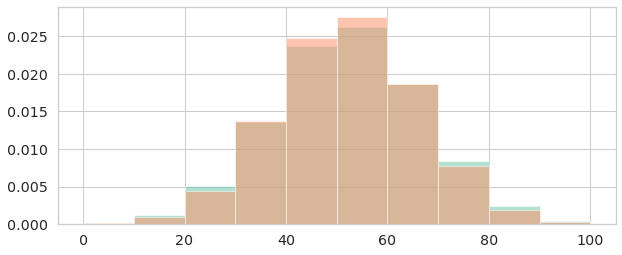

In [90]:
# Отрисовка графика
plt.figure(figsize=(10, 4))

# гистограмма для маленьких школ
plt.hist(
    small_schools["test_score"], 
    bins=10, 
    density=True, 
    alpha=0.5, 
)

# гистограмма для больших школ
plt.hist(
    large_schools["test_score"], 
    bins=10, 
    density=True, 
    alpha=0.5, 
)

plt.show()

**Вывод:** Как можем заметить из двух гистограмм, количество учеников в школе не влияет на средний балл по школе. Поэтому лучше выбирать школы по среднему баллу учеников.

---

### Задача 2

Задача заключается в работе с данными о трендах на <a target="_blank" href="https://www.youtube.com/">YouTube</a>. В этом вам поможет библиотека `seaborn`, которая была рассмотрена на одной из последних лекций.

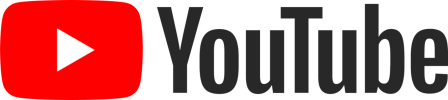


<b>1. Подготовка данных</b>

Скачайте файл `RUvideos_short.csv` с данными о видео в российском сегменте Youtube с 14 ноября по 21 ноября 2017 года. Полная версия данных доступна на <a target="_blank" href="https://www.kaggle.com/datasnaek/youtube-new#RUvideos.csv">kaggle</a>.

Прочитайте данные с помощью библиотеки `pandas` и напечатайте начало таблицы. В колонке `trending_date` записана дата. При чтении таблицы распознайте ее.

*Замечание. Часто считывание дат &mdash; головная боль аналитика.*

In [91]:
dates = pd.read_csv('RUvideos_short.csv')  
dates["trending_date"] = pd.to_datetime(dates['trending_date'], format="%y.%d.%m")
dates.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,2017-11-14,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


В таблице много лишних данных. Оставьте следующие столбцы:
* `trending_date` &mdash; дата в формате год-день-месяц;
* `category_id` &mdash; категория видео, названия приведены в файле `RU_category_id.json`;
* `views` &mdash; количество просмотров видео;
* `likes` &mdash; количество лайков;
* `dislikes` &mdash; количество дислайков;
* `comment_count` &mdash; количество комментариев.

Из даты оставьте только день. Для этого можно пройтись циклом по всем датам и взять поле `day` у объекта даты. Напечатайте начало таблицы.

In [92]:
table = dates.copy()
table = table[['trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count']]
for i in range(len(table.trending_date)):
    table['trending_date'][i] = table['trending_date'][i].day
table.head()

<ipython-input-92-6c311b880d95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['trending_date'][i] = table['trending_date'][i].day


,trending_date,category_id,views,likes,dislikes,comment_count
0,14,22,62408,334,190,50
1,14,22,330043,43841,2244,2977
2,14,24,424596,49854,714,2944
3,14,22,112851,3566,122,80
4,14,24,243469,36216,631,1692


<b>2. Некоторая визуализация</b>

Постройте ящики с усами на каждый день по количеству просмотров. Насколько хороший получился график?

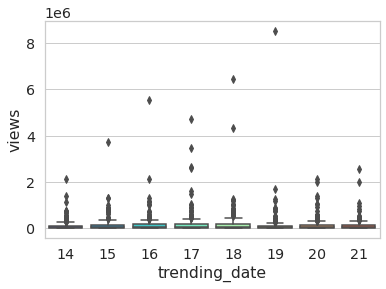

In [93]:
plot = sns.boxplot(x='trending_date', y='views', data = table, palette='rainbow');

**Вывод:** как можем заметить, тут выбран неудачный масштаб. Это можно исправить, выкинув выбросы из графика.

Исправьте этот недостаток, установив некоторое значение. 

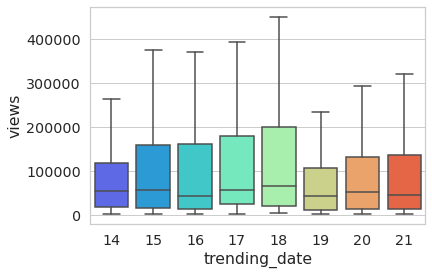

In [94]:
sns.boxplot(x='trending_date', y='views', data = table, palette='rainbow', showfliers=False);

Постройте `jointplot` по всем данным для количества просмотров по горизонтальной оси и количества лайков по вертикальной. Насколько информативен такой график?

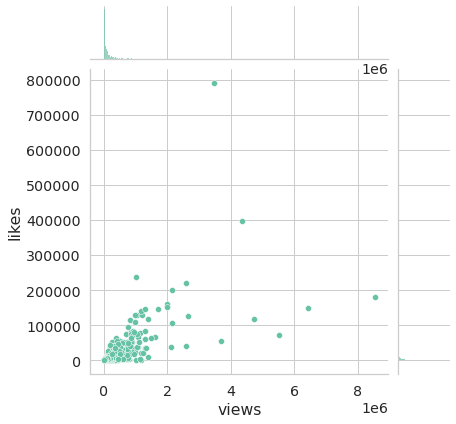

In [95]:
sns.jointplot(x='views', y='likes', data=table, kind='scatter');

Исправьте этот недостаток.

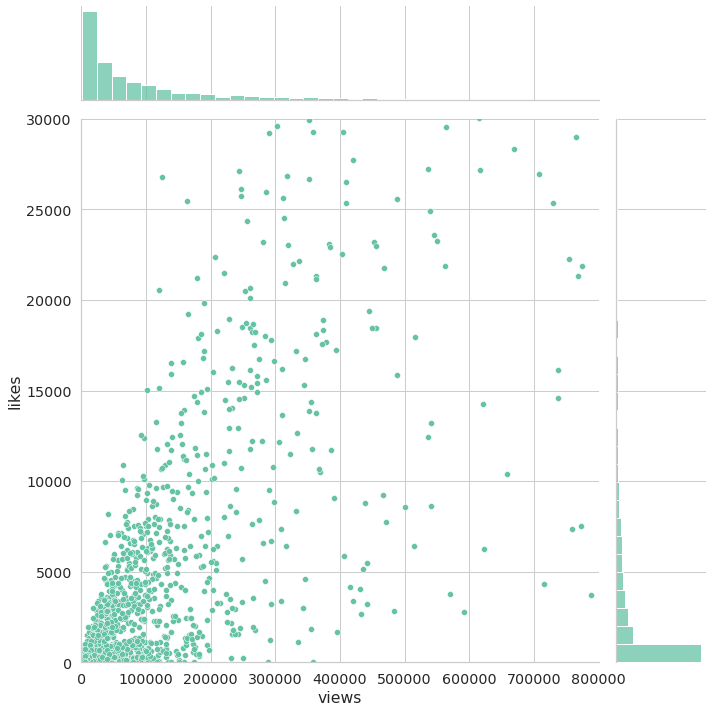

In [96]:
sns.jointplot(x='views', y='likes', data=table, kind='scatter',xlim = (0,800000), ylim = (0,30000), height=10);


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 3

<a target="_blank" href="https://www.netflix.com">Netflix</a> за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  


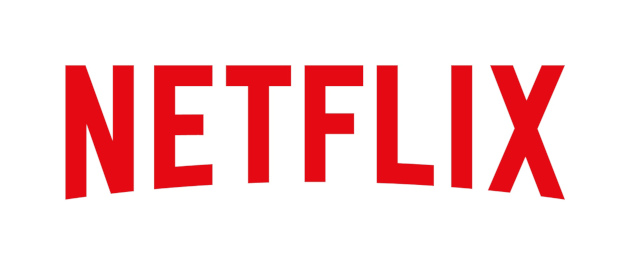

Описание признаков:
* `title` &mdash; название шоу;
* `rating` &mdash; рейтинг шоу. Например: G, PG, TV-14, TV-MA;
* `ratingLevel` &mdash; описание рейтинговой группы и особенностей шоу;
* `release year` &mdash; год выпуска шоу;
* `user rating score` &mdash; оценка пользователей.


Загрузите данные, выполнив код ниже.

In [ ]:
data = pd.read_csv(<путь до данных>, encoding='cp437')

del data['ratingDescription'], data['user rating size']

Удалите из данных дупликаты. Сколько объектов удалено?

In [ ]:
...

Сколько объектов осталось?

In [ ]:
...

Есть ли в данных пропуски?

Если да, то при дальнейшем анализе подумайте, как их корректнее обработать. Учтите, что многие методы умеют работать с пропусками.

In [ ]:
...

Сколько рейтинговых групп представлено в данных?

In [ ]:
...

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

In [ ]:
...

**Вывод:** <...>

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
...

**Ответ:** <...>

В какие годы были запущены шоу, представленные в датасете?

In [ ]:
...

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

In [ ]:
...

**Вывод:** <...>

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? "Успешнее" означает, что пользователи в среднем ставили более высокие оценки.
Ответить на этот вопрос вам поможет график, который вы построили выше.

In [ ]:
...

**Вывод:** <...>

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? [Подсказка](https://mipt-stats.gitlab.io/courses/ad_fivt/Jobs.jpg)

Постройтре самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

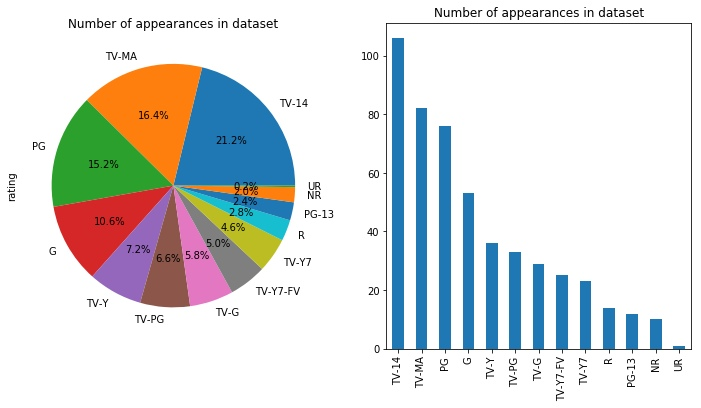

In [ ]:
...

**Вывод:** <...>

Составьте топ-13 самых высоко оцененных шоу. Выберите из данного топа шоу, которое вам наиболее нравится. Обозначим это шоу N.
Ответьте на следующие вопросы.
* Какое шоу является худшим по оценкам в рейтинговой группе, к которой принадлежит N?  
* Сколько шоу было выпущено в одном году с N?  
* Насколько бы изменилась средняя оценка шоу, выпущенных в одном году с N, если бы Netflix не запустили шоу N?

In [ ]:
...

Ответьте на следующие вопросы, проанализировав `boxplot`-график.
* Какую рейтинговую группу зрители оценивали выше всего в последние пять лет, за которые есть данные? 
* Как менялись оценки пользователей с течением времени? Постройте `boxplot` для каждого десятилетия.

In [ ]:
...

**Вывод:** <...>

---
### Задача 4

В данной задаче вам нужно будет продолжить анализ данных о видео на YouTube. Информация об имени категории видео содержится в файле `RU_category_id.json`. Следующий код читает этот файл, извлекает из него необходимую информацию, и записывает в виде `pandas`-таблицы.

In [97]:
import json

with open('./RU_category_id.json') as json_file:
    json_data = json.load(json_file)
    
category = pd.DataFrame(columns=['id', 'name'])

for item in json_data['items']:
    category = category.append(
        {'id': int(item['id']),
         'name': item['snippet']['title']},
        ignore_index=True
    )
    
category['id'] = category['id'].astype(int)
category

,id,name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Добавьте к вашим данным имена категорий с помощью `pd.merge`.

In [98]:
table = table.merge(category, left_on='category_id', right_on='id')
table

,trending_date,category_id,views,likes,dislikes,comment_count,id,name
0,14,22,62408,334,190,50,22,People & Blogs
1,14,22,330043,43841,2244,2977,22,People & Blogs
2,14,22,112851,3566,122,80,22,People & Blogs
3,14,22,97006,2259,330,887,22,People & Blogs
4,14,22,148974,5434,5247,1612,22,People & Blogs
...,...,...,...,...,...,...,...,...
1516,19,19,9211,325,14,31,19,Travel & Events
1517,20,19,135817,5714,331,781,19,Travel & Events
1518,20,19,44074,883,36,152,19,Travel & Events
1519,20,19,6985,306,16,317,19,Travel & Events


Составьте сводную таблицу о количестве просмотров по дням для каждой категории видео с помощю функции `pivot_table`.

In [99]:
inf_table = table.pivot_table(values='views', index='name', columns='trending_date', margins=True)
inf_table

trending_date,14,15,16,17,18,19,20,21,All
name,,,,,,,,,
Autos & Vehicles,112574.166667,173036.916667,186509.818182,115556.333333,1.903430e+05,1.929711e+05,137537.285714,129183.363636,153002.674699
Comedy,256765.222222,230688.277778,346407.750000,222251.562500,3.460216e+05,2.963815e+05,376541.333333,420674.818182,305909.163462
Education,34930.750000,7212.500000,3481.500000,18367.875000,5.121520e+04,6.216600e+04,90195.000000,62303.000000,39614.088235
Entertainment,200415.360000,251880.476190,168667.300000,491997.520000,2.506647e+05,1.781088e+05,209590.256410,218360.142857,243599.406542
Film & Animation,45472.571429,77653.083333,82865.142857,113809.875000,1.434217e+05,7.681714e+04,135488.210526,110129.478261,102726.938931
Gaming,110699.625000,268270.166667,527716.333333,92845.666667,1.200614e+05,4.832900e+04,141969.000000,140173.857143,161379.888889
Howto & Style,313088.428571,260403.500000,18537.571429,178594.857143,1.223449e+05,3.139160e+04,175285.500000,31819.000000,135100.904762
Music,122317.833333,158561.900000,314697.600000,917939.700000,6.972429e+05,2.216507e+05,190902.375000,115610.571429,373030.736111
News & Politics,48097.333333,51046.333333,55909.142857,65861.421053,5.028605e+04,4.114660e+04,41078.937500,48567.120000,50097.255814


Визуализируйте таблицу с помощью `heatmap`. Для информативности поделите все числа на $10^6$.

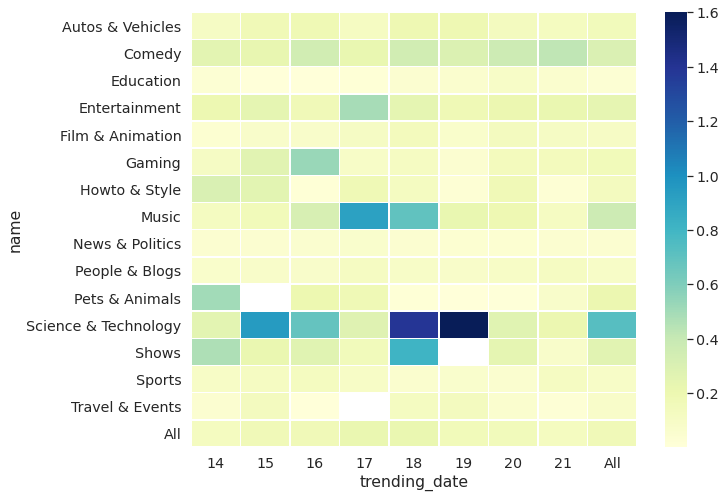

In [120]:
plt.figure (figsize=(10,8))
sns.heatmap(inf_table/(10 ** 6), linewidths=.5, cmap="YlGnBu", vmax=1.6);

Сделайте аналогичную сводную таблицу, добавив суммы по строкам и столбцам, назвав их "Всего просмотров".

In [112]:
all_inf_table = table.pivot_table(values='views', index='name', columns='trending_date', aggfunc=np.sum, margins=True, margins_name='Всего просмотров');
all_inf_table

trending_date,14,15,16,17,18,19,20,21,Всего просмотров
name,,,,,,,,,
Autos & Vehicles,1350890.0,2076443.0,2051608.0,1386676.0,1713087.0,1736740.0,962761.0,1421017.0,12699222
Comedy,2310887.0,4152389.0,4156893.0,3556025.0,3806238.0,3556578.0,5648120.0,4627423.0,31814553
Education,139723.0,28850.0,6963.0,146943.0,256076.0,310830.0,270585.0,186909.0,1346879
Entertainment,5010384.0,5289490.0,3373346.0,12299938.0,7519942.0,5877590.0,8174020.0,4585563.0,52130273
Film & Animation,636616.0,931837.0,1160112.0,1820958.0,2725012.0,1075440.0,2574276.0,2532978.0,13457229
Gaming,885597.0,1609621.0,1583149.0,557074.0,600307.0,193316.0,851814.0,981217.0,7262095
Howto & Style,2191619.0,1562421.0,129763.0,1250164.0,1468139.0,156958.0,1402284.0,350009.0,8511357
Music,733907.0,1585619.0,4720464.0,9179397.0,6972429.0,1329904.0,1527219.0,809274.0,26858213
News & Politics,1010044.0,1225112.0,1174092.0,1251367.0,1056007.0,1028665.0,657263.0,1214178.0,8616728


В чем проблема с информативностью подобных таблиц? Исправьте это.

*Подсказка*: посмотрите на графики, которые вы построили ранее. 

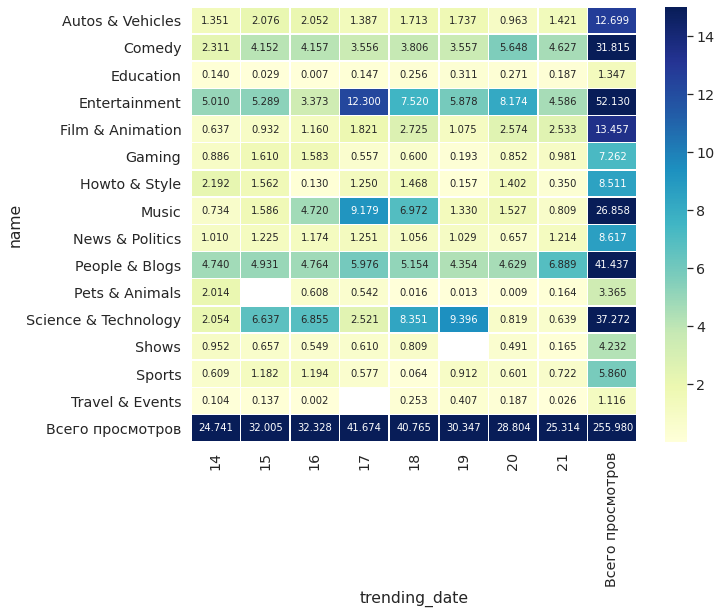

In [114]:
plt.figure (figsize=(10,8))
sns.heatmap(all_inf_table/(10 ** 6), annot=True, linewidths=.5, cmap="YlGnBu", fmt=".3f", vmax=15);

**Вывод:** Для лучшего восприятия и анализа нужно использовать графики. Они наглядно показывают распределение и зависимости. Также данные не должны быть слишком длинные для этого нужно подбирать точность. Графики должны быть читаемы.

---

### Задача 5

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

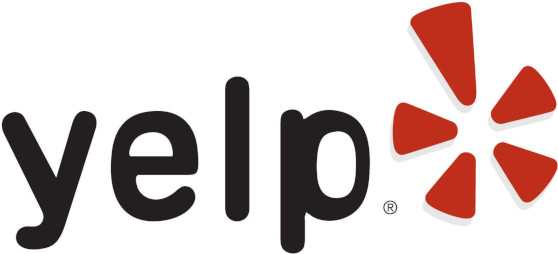

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [ ]:
...

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [ ]:
...

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [ ]:
...

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города `N` и сравните ее с построенным графиком. Попробуйте также для графиков в этой задаче автоматически подгружать карту города в качестве фона графика, используя <a href="https://plotly.com/python/scattermapbox/">примеры</a>.

*Замечание. Если у вас возникает ошибка `Notebook validation failed`, попробуйте открыть ноутбук текстовым редактором и в самом конце заменить `"nbformat_minor": 1` на `"nbformat_minor": 4`.*

In [ ]:
...

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [ ]:
...

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [ ]:
...

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [ ]:
...

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша.

In [ ]:
...

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [ ]:
...

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [ ]:
...

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [ ]:
...

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [ ]:
...

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <...>

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [ ]:
...

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** <...>

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
...

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
...

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>